In [4]:
import matplotlib.pyplot as plt

In [219]:
import seaborn as sns # used for theme
sns.set_theme()

In [230]:
from itertools import islice

In [5]:
from random import gauss

In [6]:
l = [gauss(0, 1) for _ in range(500)]

(array([  2.,  10.,  39.,  74., 119., 108.,  76.,  39.,  25.,   8.]),
 array([-2.9685733 , -2.38880416, -1.80903503, -1.2292659 , -0.64949677,
        -0.06972764,  0.51004149,  1.08981062,  1.66957975,  2.24934888,
         2.82911801]),
 <BarContainer object of 10 artists>)

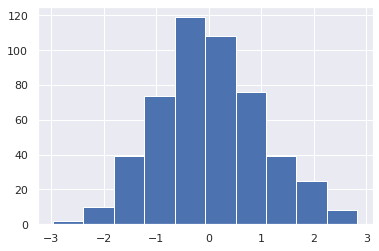

In [211]:
plt.hist(l)

In [8]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/andrea/.wget-hsts'. HSTS will be disabled.
--2020-10-14 16:12:12--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12720645 (12M) [text/plain]
Saving to: ‘GLT_filtered.csv’

GLT_filtered.csv    100%[===================>]  12.13M   960KB/s    in 13s     

2020-10-14 16:12:27 (942 KB/s) - ‘GLT_filtered.csv’ saved [12720645/12720645]



## 2.1 Data preprocessing on Global Land Temperature

In [9]:
import csv

In [13]:
with open('./GLT_filtered.csv') as f:
    dataset = []
    for row in csv.reader(f):
        dataset.append(row)

In [27]:
print(len(dataset))

219576


In [19]:
print(dataset[0])

['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [28]:
print(dataset[1])

['1849-01-01', '26.704', '1.435', 'Abidjan', "Côte D'Ivoire", '5.63N', '3.23W']


* Date is ordinal
* Average temperature is continuous
* Averate temperature uncertainty is continuous
* City is categorical (nominal)
* Country is categorical
* Latitude is continuous
* Longitude is continuous

In [190]:
temperatures = [row[1] for row in dataset[1:]]

In [191]:
for i in range(len(temperatures)):
    try:
        temperatures[i] = float(temperatures[i])
    except ValueError:
        temperatures[i] = float('nan')

In [192]:
min(temperatures)

-26.772

In [193]:
max(temperatures)

88.00699999999999

In [194]:
sum(map(isnan, temperatures)) / len(temperatures)

0.12561083912102927

In [195]:
from math import isnan

In [201]:
for i in range(len(temperatures)):
    if isnan(temperatures[i]):
        # maybe competitive programming is useful after all...
        j = i
        previous = 0
        while j >= 0:
            if isnan(temperatures[j]):
                j-=1
            else:
                previous = temperatures[j]
                break
        successor = 0
        while j < len(temperatures):
            if isnan(temperatures[j]):
                j+=1
            else:
                successor = temperatures[j]
                break
        
        temperatures[i] = (previous + successor) / 2

In [202]:
assert(not any(isnan(t) for t in temperatures))

(array([1.8000e+01, 2.9700e+02, 8.7700e+02, 1.7350e+03, 4.0410e+03,
        7.3520e+03, 1.1924e+04, 1.3550e+04, 2.0405e+04, 3.3491e+04,
        4.1831e+04, 5.9772e+04, 1.8518e+04, 3.4060e+03, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+01, 5.9400e+02, 1.2660e+03, 4.4200e+02]),
 array([-26.772  , -22.18084, -17.58968, -12.99852,  -8.40736,  -3.8162 ,
          0.77496,   5.36612,   9.95728,  14.54844,  19.1396 ,  23.73076,
         28.32192,  32.91308,  37.50424,  42.0954 ,  46.68656,  51.27772,
         55.86888,  60.46004,  65.0512 ,  69.64236,  74.23352,  78.82468,
         83.41584,  88.007  ]),
 <BarContainer object of 25 artists>)

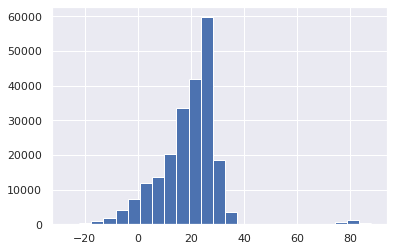

In [220]:
plt.hist(temperatures, bins=25)

80 Degrees seem a lot...

In [214]:
def print_top_N(city, N):
    city_temperatures = list(map(lambda i:i[1], filter(
        lambda r: r[0][3] == city,
        zip(dataset[1:], temperatures)
    )))

    return {
        'coldest': sorted(city_temperatures)[:N],
        'hottest': sorted(city_temperatures, reverse=True)[:N]
    }
    

print_top_N('Abidjan', 5)

{'coldest': [22.363000000000003, 22.377, 22.528, 22.63000000000001, 22.644],
 'hottest': [29.923, 29.596, 29.477, 29.471, 29.471]}

## 2.2 Textual data preparation on IMDB reviews

In [221]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/andrea/.wget-hsts'. HSTS will be disabled.
--2020-10-14 17:00:57--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33322169 (32M) [text/plain]
Saving to: ‘aclimdb_reviews_train.txt’

aclimdb_reviews_tra 100%[===================>]  31.78M   563KB/s    in 56s     

2020-10-14 17:01:54 (577 KB/s) - ‘aclimdb_reviews_train.txt’ saved [33322169/33322169]



In [260]:
imdb = []
with open('./aclimdb_reviews_train.txt') as f:
    for row in islice(csv.reader(f), 1, 100_000): # Take the first 2 rows, skipping header
        imdb.append(row[0])

In [261]:
import string
def tokenize(docs):
    tokens = []
    for doc in docs:
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")
        split_doc = [token.lower() for token in doc.split(" ") if token]
        tokens.append(split_doc)
        
    return tokens

In [262]:
imdb = tokenize(imdb)

### TD-IDF

In [264]:
from collections import Counter

In [284]:
%%time
df = Counter()
for review in imdb:
    for token in review:
        df[token] += 1

CPU times: user 2.97 s, sys: 0 ns, total: 2.97 s
Wall time: 3.07 s


In [287]:
import math

In [290]:
IDF = dict()
for (tok,df_tok) in df.items():
    IDF[tok] = math.log(len(imdb) / df_tok)

We see that the most-frequent words are articles, prepositions, and pronouns. And HTML newlines... `br`.

This is because we computed the frequency, inversed in then sorted ascending. Which means that the smallest inverse frequencies i.e. the most frequent are first.

In [301]:
list(sorted(IDF.items(), key=lambda i:i[1]))[:10]

[('the', -2.600307591250224),
 ('and', -1.8816123608440078),
 ('a', -1.875524471329221),
 ('of', -1.7637851443722985),
 ('to', -1.6917033787176168),
 ('is', -1.4570323756252324),
 ('br', -1.4048314821183017),
 ('it', -1.3496096296451128),
 ('in', -1.3240571898441509),
 ('i', -1.2543274583283988)]

We can see how tokens approximately follow a log-zipf distribution.

(array([1.0000e+00, 4.0000e+00, 7.0000e+00, 6.0000e+00, 1.2000e+01,
        1.8000e+01, 2.6000e+01, 5.4000e+01, 6.7000e+01, 1.2600e+02,
        1.8600e+02, 3.1500e+02, 4.3800e+02, 6.8300e+02, 1.0030e+03,
        1.4680e+03, 2.0580e+03, 2.6340e+03, 3.4750e+03, 4.8000e+03,
        5.2940e+03, 6.4560e+03, 8.8060e+03, 9.1930e+03, 2.8797e+04]),
 array([-2.60030759, -2.09123004, -1.5821525 , -1.07307495, -0.5639974 ,
        -0.05491985,  0.4541577 ,  0.96323524,  1.47231279,  1.98139034,
         2.49046789,  2.99954543,  3.50862298,  4.01770053,  4.52677808,
         5.03585563,  5.54493317,  6.05401072,  6.56308827,  7.07216582,
         7.58124336,  8.09032091,  8.59939846,  9.10847601,  9.61755356,
        10.1266311 ]),
 <BarContainer object of 25 artists>)

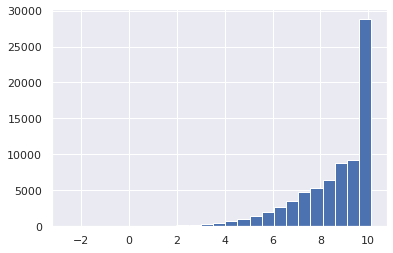

In [303]:
plt.hist(IDF.values(), bins=25)

In [342]:
%%time
tfidf_imdb = []
for doc in imdb:
    tf_doc = Counter(doc)
    tfidf_doc = {tok: TF*IDF[tok] for tok, TF in tf_doc.items()}
    tfidf_imdb.append(tfidf_doc)

CPU times: user 1.25 s, sys: 234 ms, total: 1.48 s
Wall time: 1.48 s


In [365]:
set(tfidf_imdb[10]) & (set(tfidf_imdb[20]))

{'a', 'and', 'i', 'in', 'it', 'movie', 'on', 'the', 'there', 'this', 'with'}